# Logistic Regression of Mobile Device Purchase Intent

In [5]:
import pandas as pd
import numpy as np
import os 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [30]:
excel_file = pd.read_excel(r'mobile_devicelr.xlsx')
df = pd.DataFrame(excel_file)
df = df.dropna(how = "any")
df.head()

,device,hand comfort,no sharp corners,easy to drop,too heavy,gaps - enter dirt,gaps - poor construction,easy reach sidekeys,locate by feel sidekeys,learn buttons,...,photos exceed expectations,take high quality pictures,significantly better photos,low light photos,photos / videos faithful capture,hold special music,too big pocket,comfortable for calls,overall hardware satisfied,Purchase_intent
107,Bandit,6.0,7.0,5.0,5.0,1.0,1.0,2.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,6.0,5.0,7.0,1
108,Bandit,2.0,6.0,7.0,3.0,2.0,1.0,4.0,5.0,6.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,4.0,0
109,Bandit,5.0,7.0,2.0,3.0,2.0,2.0,3.0,6.0,7.0,...,6.0,6.0,6.0,6.0,6.0,7.0,5.0,6.0,6.0,1
110,Bandit,6.0,6.0,3.0,1.0,1.0,1.0,6.0,6.0,7.0,...,4.0,3.0,4.0,4.0,4.0,7.0,5.0,7.0,7.0,0
111,Bandit,3.0,7.0,7.0,7.0,1.0,1.0,1.0,7.0,6.0,...,2.0,2.0,2.0,2.0,7.0,2.0,7.0,2.0,3.0,0


these are the Eigenvalues produced by the Factor Analysis procedure: 

    Common_Factor_Eigenvalues
0                    8.072643
1                    3.111377
2                    2.278767
3                    1.364537
4                    1.239093
5                    0.726004
6                    0.697149
7                    0.592917
8                    0.499246
9                    0.376145
10                   0.237964
11                   0.219088
12                   0.141589
13                   0.100791
14                   0.067062
15                   0.046164
16                   0.003958
17                  -0.011643
18                  -0.044071
19                  -0.070793
20                  -0.088376
21                  -0.130389
22                  -0.138408
23                  -0.168564
24                  -0.200314
25                  -0.213284
26                  -0.244689
27                  -0.254894
28                  -0.283596
29                  -0.299329

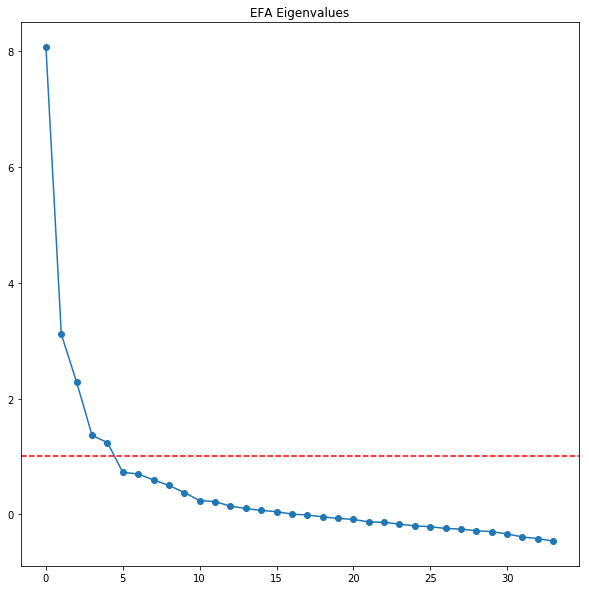




 The table below shows the factor loadings.  These can be read as essentially correlationsbetween each variable and its factor.  Here we have suppressed low factor loadings (below absolute value of .42) 



In [87]:
#Factor Analysis using factor_analyzer

import pandas as pd
from factor_analyzer import FactorAnalyzer
df_features = df[df.columns[1:35]]
fa = FactorAnalyzer()
fa.analyze(df_features, 5, rotation='varimax', method='ml',bounds = (.3,1))

#produce Eigenvalues
ev, v = fa.get_eigenvalues()
print("these are the Eigenvalues produced by the Factor Analysis procedure: \n")
print(v)
fig = plt.figure(figsize=(10, 10))
plt.plot(v,marker='o')
plt.title('EFA Eigenvalues')
plt.axhline(y=1, ls="--", c='red')
print("\n\nthis is a plot showing the Eigenvalues. \n")
plt.show()
type(v)


#print the factor loadings for each factor
print("\n\n\n The table below shows the factor loadings.  These can be read as essentially correlations\
between each variable and its factor.  Here we have suppressed low factor loadings (below absolute value of .42) \n")
FL = fa.loadings
FL =FL[FL > abs(.42)].fillna('')




In [88]:
FL

,Factor1,Factor2,Factor3,Factor4,Factor5
hand comfort,,,0.64007,,
no sharp corners,,,,,
easy to drop,,,,,
too heavy,,,,,
gaps - enter dirt,,,,,0.610052
gaps - poor construction,,,,,0.562906
easy reach sidekeys,,,0.503136,0.47642,
locate by feel sidekeys,,,,0.642997,
learn buttons,,,,0.630342,
feel know where to press,,,,0.635432,


In [60]:
FS = fa.get_scores(df_features)
FS

,Factor1,Factor2,Factor3,Factor4,Factor5
0,1.028043,0.949712,-0.995784,0.779472,-0.320245
1,1.159481,0.971326,-2.685843,-0.090185,-0.664653
2,0.488533,0.121956,-0.283487,0.416322,-0.796444
3,0.075011,-1.190369,0.427168,0.937385,-0.425516
4,-1.430572,-1.686260,-3.205902,1.166158,-1.886401
5,1.396866,-0.725822,-0.938677,-0.695048,-1.269644
6,0.985800,-0.445455,0.171381,0.116756,2.085264
7,-0.301261,0.321515,0.304313,-0.498841,-0.113537
8,1.088404,-2.275231,-2.649616,-1.508759,-0.305411
9,0.606958,-0.228927,-2.638986,-0.144426,0.296337


In [89]:
import pandas as pd
df_n = df.dropna(how = "any")
df_n
df_n = df_n.reset_index(drop=True)
df_n
FS['PI'] = pd.Series(df_n['Purchase_intent'])

FS.rename(columns={'Factor1': 'Ease_type', 'Factor2': 'Pic_quality', 'Factor3': 'grip_comfort', 'Factor4': 'button_reach', 'Factor5': 'quality'}, inplace=True)

FS

,Ease_type,Pic_quality,grip_comfort,button_reach,quality,PI
0,1.028043,0.949712,-0.995784,0.779472,-0.320245,1
1,1.159481,0.971326,-2.685843,-0.090185,-0.664653,0
2,0.488533,0.121956,-0.283487,0.416322,-0.796444,1
3,0.075011,-1.190369,0.427168,0.937385,-0.425516,0
4,-1.430572,-1.686260,-3.205902,1.166158,-1.886401,0
5,1.396866,-0.725822,-0.938677,-0.695048,-1.269644,1
6,0.985800,-0.445455,0.171381,0.116756,2.085264,1
7,-0.301261,0.321515,0.304313,-0.498841,-0.113537,0
8,1.088404,-2.275231,-2.649616,-1.508759,-0.305411,0
9,0.606958,-0.228927,-2.638986,-0.144426,0.296337,0


In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
FS['PI'].value_counts()

1    78
0    62
Name: PI, dtype: int64

In [70]:
df_n.groupby('Purchase_intent').mean()


,hand comfort,no sharp corners,easy to drop,too heavy,gaps - enter dirt,gaps - poor construction,easy reach sidekeys,locate by feel sidekeys,learn buttons,feel know where to press,...,eye strain,photos exceed expectations,take high quality pictures,significantly better photos,low light photos,photos / videos faithful capture,hold special music,too big pocket,comfortable for calls,overall hardware satisfied
Purchase_intent,,,,,,,,,,,,,,,,,,,,,
0,4.977419,5.635484,4.337097,3.470968,3.035484,2.425806,4.856452,5.079032,5.261290,4.811290,...,2.559677,5.222581,5.420968,4.966129,5.193548,5.55,3.246774,4.725806,4.795161,4.996774
1,6.133333,6.320513,3.143590,2.212821,2.784615,2.028205,5.721795,5.792308,6.123077,5.858974,...,2.826923,5.075641,5.835897,5.614103,5.365385,5.90,2.900000,3.829487,6.171795,6.410256


In [90]:
%matplotlib inline

In [91]:
import statsmodels.api as sm

X = FS[FS.columns[0:5]]
y = FS[FS.columns[5]]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.504602
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.265     
Dependent Variable: PI               AIC:              151.2886  
Date:               2018-11-15 15:39 BIC:              165.9968  
No. Observations:   140              Log-Likelihood:   -70.644   
Df Model:           4                LL-Null:          -96.124   
Df Residuals:       135              LLR p-value:      2.2755e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Ease_type        0.6123    0.2563  2.3890  0.0169   0.1100  1.1147
Pic_quality      0.2358    0.2352  1.0028  0.3160  -0.2251  0.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10  5]
 [ 6 21]]


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.81      0.78      0.79        27

   micro avg       0.74      0.74      0.74        42
   macro avg       0.72      0.72      0.72        42
weighted avg       0.74      0.74      0.74        42



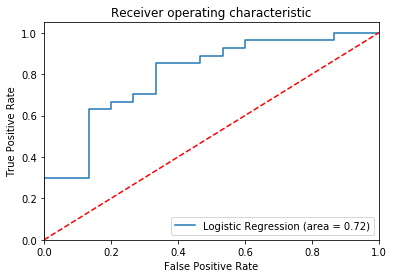

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()